In [1]:
import pandas as pd
df_ultimate_test = pd.read_table("artificial_test.data", sep=" ", header=None)
df_ultimate_test = df_ultimate_test.drop(df_ultimate_test.columns[500], axis=1) # kolumna 500 do wyrzucenia
df_ultimate_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510
1,485,508,493,487,478,472,504,476,479,475,...,486,480,535,534,514,452,484,495,548,477
2,483,521,507,475,493,486,421,475,496,483,...,491,476,498,495,508,528,486,465,508,503
3,474,504,576,480,553,483,524,478,483,483,...,521,475,470,463,509,525,479,467,552,517
4,495,474,523,479,495,488,485,476,497,478,...,510,471,522,343,509,520,475,493,506,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,493,458,503,478,517,479,472,478,444,477,...,469,475,485,443,517,486,474,489,506,506
596,481,484,481,490,449,481,467,478,469,483,...,506,485,508,599,498,527,481,490,455,451
597,485,485,530,480,444,487,462,475,509,494,...,442,474,502,368,453,482,478,481,484,517
598,477,469,528,485,483,469,482,477,494,476,...,473,476,453,638,471,538,470,490,613,492


In [2]:
df_data_X = pd.read_table("artificial_train.data", sep=" ", header=None)
df_data_X = df_data_X.drop(df_data_X.columns[500], axis=1)
df_data_X

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,467,479,449,588,499,506,475,463,507,501
1996,480,475,476,480,495,482,515,479,480,484,...,464,474,473,424,454,570,476,493,465,485
1997,480,517,631,470,485,474,535,476,493,466,...,501,483,479,687,488,488,483,500,523,481
1998,484,481,505,478,542,477,518,477,510,472,...,487,483,526,750,486,529,484,473,527,485


In [3]:
df_data_Y = pd.read_table("artificial_train.labels", sep=" ", header=None)
df_data_Y

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_data_X, df_data_Y, test_size=0.33, random_state=4)

In [10]:
# potencjalne wrzucenie do pipeline'u wyciaganie z xgb i pca
import xgboost as xgb
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
classification = xgb.XGBClassifier(**params)
df_data_Y_mapped = df_data_Y
df_data_Y_mapped[df_data_Y_mapped == -1] = 0
classification.fit(df_data_X, df_data_Y_mapped)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
df_data_X.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

pca = PCA(n_components=7, svd_solver='full')
selection = SelectKBest()

pca_pipeline = Pipeline(steps=[('pca', pca)])
univ_select_pipeline = Pipeline(steps = [('selectKBest', selection)])

# Define feature union
features_reductor = ColumnTransformer(transformers = [("pca", pca_pipeline, df_data_X.columns), 
                                                      ("univ_select", univ_select_pipeline, df_data_X.columns)], 
                                                      remainder='passthrough')

# Define classifier
rf = RandomForestClassifier()

# Define pipeline
pipeline = Pipeline([("features", combined_features), ("rf", rf)])

# Define parameter grid
param_grid = {
    'features__pca__n_components': [10, 20, 30],
    'features__univ_select__k': [10, 20],
}

# Define grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=10, n_jobs=-1)

# Fit grid search
grid_search.fit(X, y)

In [18]:
#classification.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": df_data_X.columns, "F-Score": classification.feature_importances_})
print(feature_importance_df.max())
# selected_features = feature_importance_df[feature_importance_df["F-Score"] >= 10]["Feature"].tolist()
# print(selected_features)

Feature    499.000000
F-Score      0.016533
dtype: float64


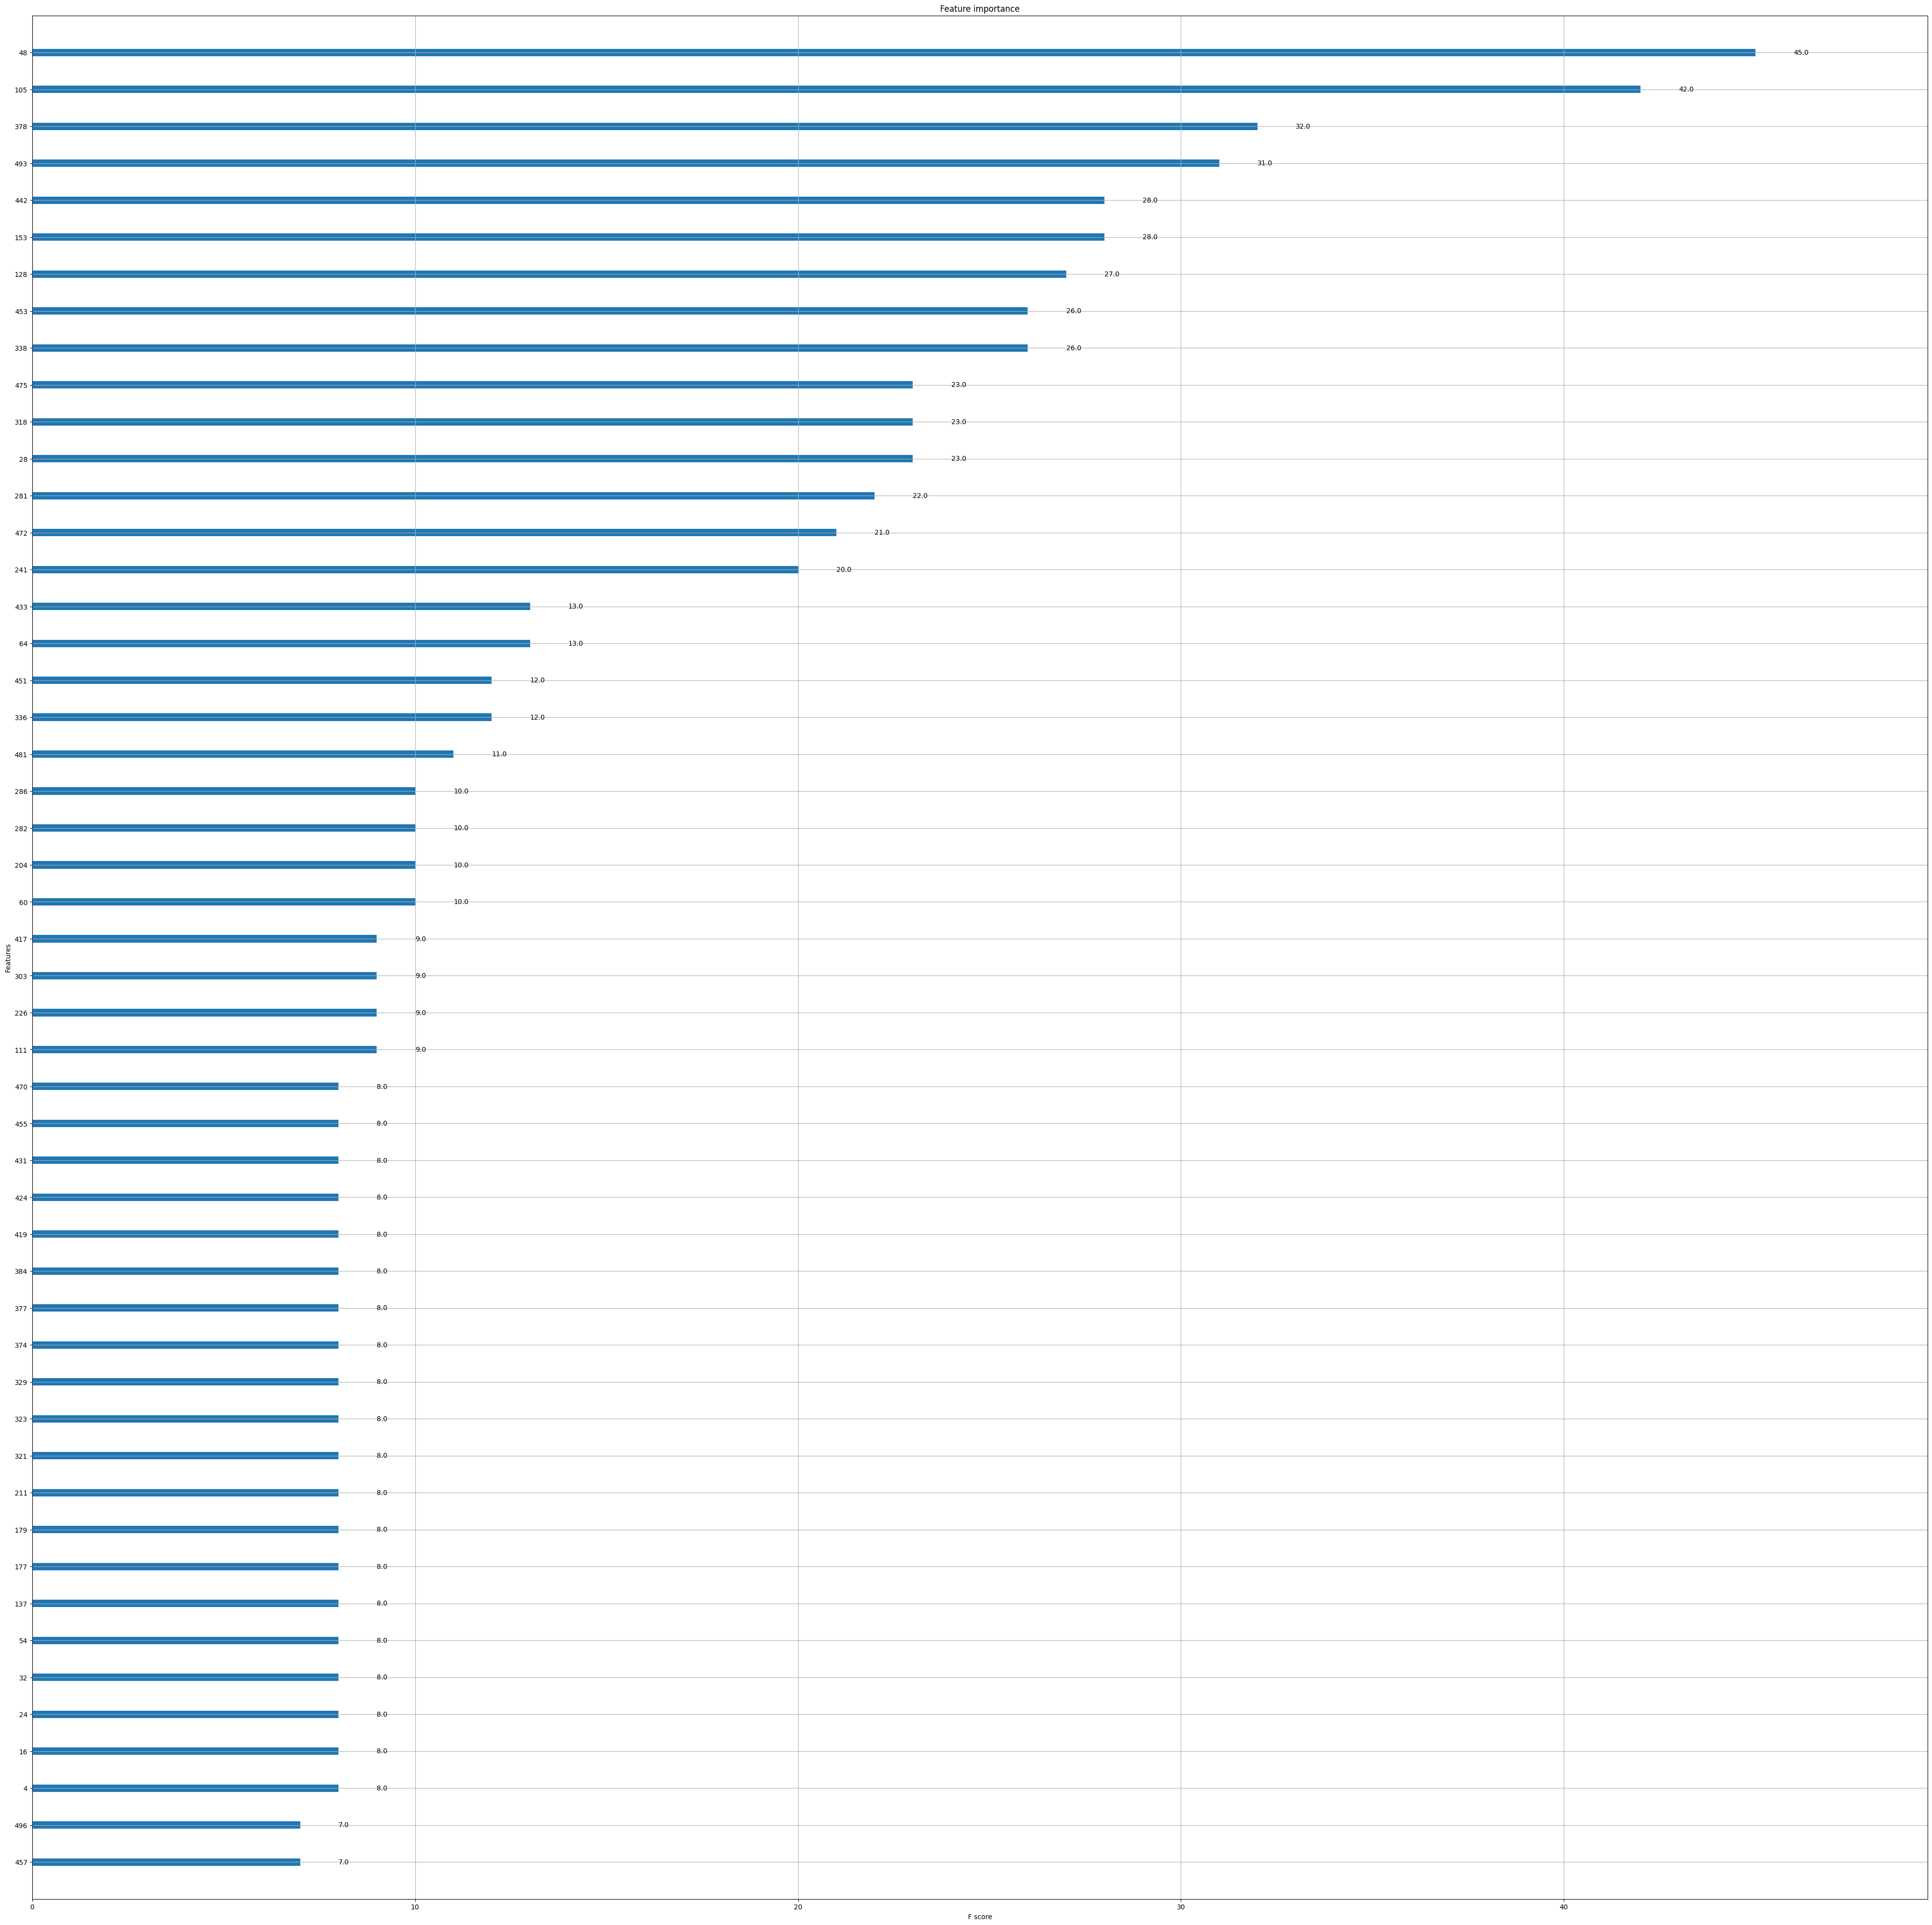

In [19]:
import matplotlib.pyplot as plt
xgb.plot_importance(classification, max_num_features=50)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In [50]:
# raw data, all columns
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
pred_y_knn = classifier.predict(X_test)
balanced_accuracy_score(y_test, pred_y_knn)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7071796567209412

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7, svd_solver='full')
df_data_X_transformed = pca.fit_transform(df_data_X, df_data_Y)
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(df_data_X_transformed, df_data_Y, test_size=0.33, random_state=4)

In [79]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)
pred_y_knn = classifier.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_knn)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8589828360470562

In [48]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression()
classifier_LR.fit(X_train_transformed, y_train)
pred_y_LR = classifier_LR.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_LR)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5801719150343003

In [49]:
from sklearn.svm import SVC
classifier_SVC = SVC()
classifier_SVC.fit(X_train_transformed, y_train)
pred_y_SVC = classifier_SVC.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_SVC)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8072981238118853

In [94]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ADA = AdaBoostClassifier(n_estimators=200)
classifier_ADA.fit(X_train_transformed, y_train)
pred_y_ADA = classifier_ADA.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_ADA)


d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6046367468385817

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GBC = GradientBoostingClassifier()
classifier_GBC.fit(X_train_transformed, y_train)
pred_y_GBC = classifier_GBC.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_GBC)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7545802683417362

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier_RFC = RandomForestClassifier(n_estimators=250)
classifier_RFC.fit(X_train_transformed, y_train)
pred_y_RFC = classifier_RFC.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_RFC)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8394908670138028

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
classifier_ETC = ExtraTreesClassifier(n_estimators=200)
classifier_ETC.fit(X_train_transformed, y_train)
pred_y_ETC = classifier_ETC.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_ETC)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8423285670992093

In [93]:
from sklearn.ensemble import VotingClassifier
model_tab_edit = [('knn', classifier), ('etc', classifier_ETC)]
model_tab = [('knn', classifier), ('etc', classifier_ETC), ('rfc', classifier_RFC)]
model_tab_with_SVC = [('knn', classifier), ('etc', classifier_ETC), ('rfc', classifier_RFC), ('svc', classifier_SVC)]

#TODO - fix: throws error when used on model_tab_with_SVC
#TODO - pipeline

voting_classifier = VotingClassifier(estimators=model_tab_edit, voting='soft', verbose=True)

voting_classifier.fit(X_train_transformed, y_train)
pred_y_voting = voting_classifier.predict(X_test_transformed)
balanced_accuracy_score(y_test, pred_y_voting)


d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[Voting] ...................... (1 of 2) Processing knn, total=   0.0s
[Voting] ...................... (2 of 2) Processing etc, total=   0.7s


0.8771937074689369

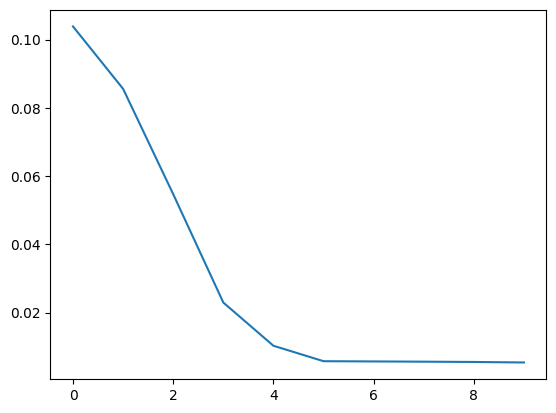

In [34]:
#df_data_X.shape
import numpy as np
pca.explained_variance_ratio_
import matplotlib.pyplot as pyplot
pyplot.plot(np.arange(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [26]:
pca.components_

array([[ 1.01963426e-04, -4.91376921e-04,  2.23881024e-03, ...,
         2.09475927e-03, -9.38218731e-04,  1.45652154e-03],
       [ 5.20839601e-04,  5.38187960e-03,  2.17503093e-04, ...,
        -1.79331735e-03,  3.42019751e-03, -2.02055348e-04],
       [ 1.92019139e-03,  2.08891331e-03, -4.02096745e-03, ...,
         1.92396820e-03,  9.14958422e-03, -2.33279799e-03],
       ...,
       [-5.54956796e-03,  7.48506004e-04,  8.78867927e-04, ...,
         3.33521667e-04, -1.97003908e-04, -2.83838420e-04],
       [-4.14900803e-03, -3.80860807e-04, -1.10515341e-03, ...,
        -9.50400455e-04,  3.06835713e-04,  2.32748720e-05],
       [-3.63420525e-03, -3.03471754e-04,  9.60278705e-04, ...,
        -1.13131150e-03, -2.60298388e-04, -7.64453561e-04]])